# Introducción

# 1 Importamos las librerías y los datos

In [2]:
!pip install jupyterthemes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.5 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Accuracy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression

from jupyterthemes import jtplot

jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)


In [4]:
df = pd.read_csv('/content/data_loan.csv')

In [5]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
# Mostramos las primeras 10 filas y las últimas 10 filas en una tabla
combined_df = pd.concat([df.head(10), df.tail(10)])

# Mostramos la tabla combinada
combined_df


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.40,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.50,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.30,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.60,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.90,3,0,1,0,0,0,0


In [7]:
# Contamos la cantidad de muestras en el conjunto de datos
num_samples = len(df)
print("Número de muestras en el conjunto de datos:", num_samples)

Número de muestras en el conjunto de datos: 5000


# 2 EDA

In [8]:
# Obtenemos dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
# Obtenemos el resumen estadístico del dataframe
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [10]:
# Mejoramos la visualización del resumen estadístico
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [11]:
# Verificamos cuántos valores nulos existen en el dataframe
# Contamos los valores nulos en el dataframe
null_counts = df.isnull().sum()

# Imprimimos la cantidad de valores nulos
print(null_counts)

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [12]:
# Calculamos e imprimimos la edad promedio
average_age = df['Age'].mean()
print("La edad promedio es:", average_age)

# Calculamos e imprimimos el porcentaje de clientes con tarjetas de crédito
credit_card_percentage = (df['CreditCard'].sum() / len(df)) * 100
print("El porcentaje de clientes con tarjetas de crédito es:", credit_card_percentage)

# Calculamos e imprimimos el porcentaje de clientes que aceptaron el préstamo personal
personal_loan_percentage = (df['Personal Loan'].sum() / len(df)) * 100
print("El porcentaje de clientes que aceptaron el préstamo personal es:", personal_loan_percentage)

La edad promedio es: 45.3384
El porcentaje de clientes con tarjetas de crédito es: 29.4
El porcentaje de clientes que aceptaron el préstamo personal es: 9.6


# 3 Visualización de datos

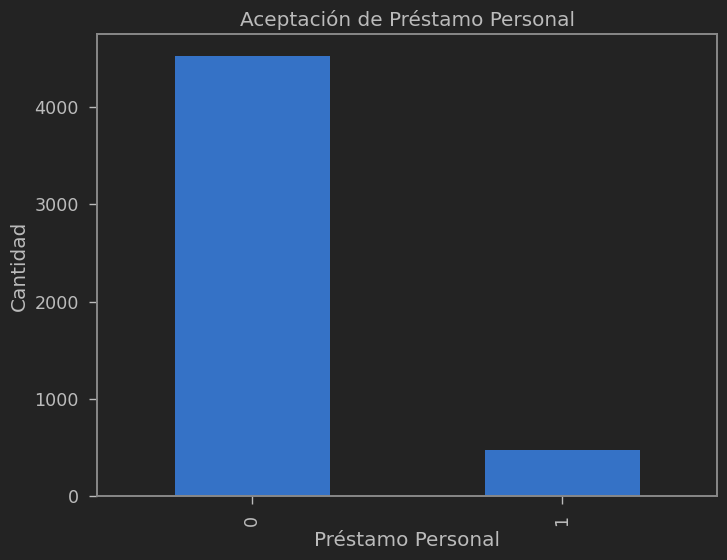

Porcentaje de clientes que aceptaron el préstamo personal: 9.6


In [13]:
# Personal Loan

# Visualizamos la columna 'Personal Loan'
conteo_prestamo_personal = df['Personal Loan'].value_counts()

# Graficamos los valores
conteo_prestamo_personal.plot(kind='bar', figsize=(8, 6))

# Establecemos etiquetas y título
plt.xlabel('Préstamo Personal')
plt.ylabel('Cantidad')
plt.title('Aceptación de Préstamo Personal')

# Mostramos la gráfica
plt.show()

# Calculamos el porcentaje de clientes que aceptaron el préstamo personal
porcentaje_aceptacion_prestamo_personal = (conteo_prestamo_personal[1] / len(df)) * 100
print("Porcentaje de clientes que aceptaron el préstamo personal:", porcentaje_aceptacion_prestamo_personal)

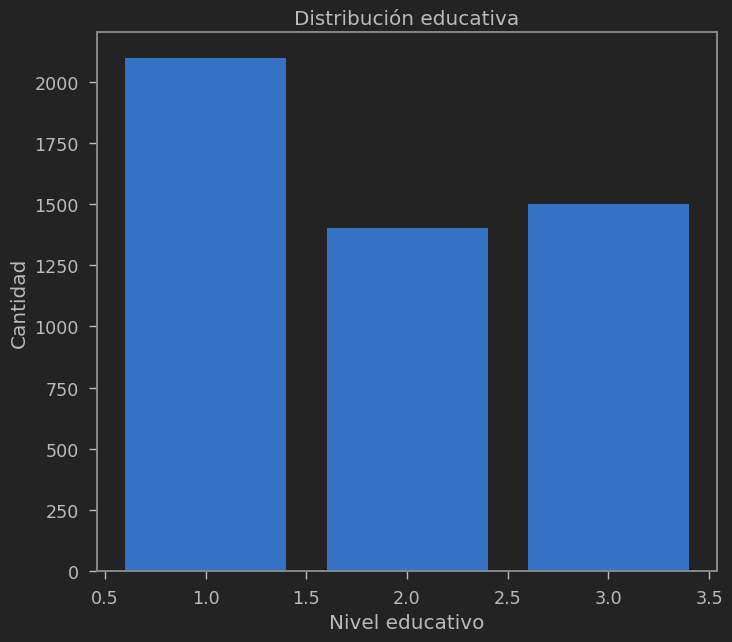

In [14]:
# Education

# Contamos las ocurrencias de cada nivel educativo
conteo_educacion = df['Education'].value_counts()

# Creamos un gráfico de barras
plt.bar(conteo_educacion.index, conteo_educacion.values)

# Establecemos las etiquetas y el título
plt.xlabel('Nivel educativo')
plt.ylabel('Cantidad')
plt.title('Distribución educativa')

# Mostramos el gráfico
plt.show()

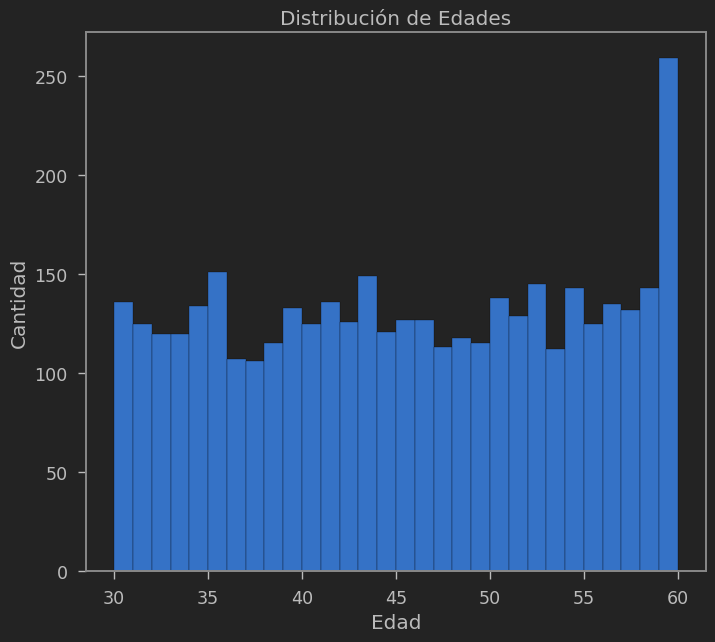

In [15]:
# Age - Distribución entre 30-60 años

# Creamos un histograma
plt.hist(df['Age'], bins=30, range=(30, 60), edgecolor='black')

# Establecemos las etiquetas y el título
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.title('Distribución de Edades')

# Mostramos el gráfico
plt.show()

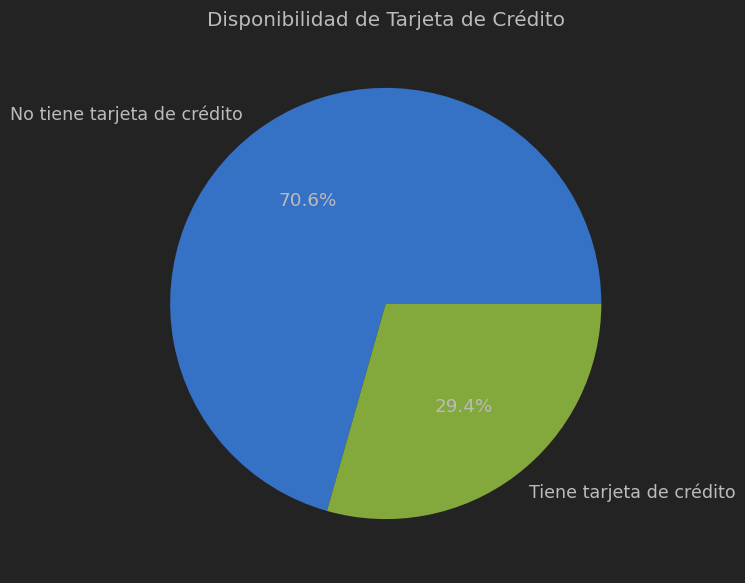

In [16]:
# Credit Card

# Contar las ocurrencias de cada disponibilidad de tarjeta de crédito
conteo_tarjeta_credito = df['CreditCard'].value_counts()

# Crear un gráfico de torta
etiquetas = ['No tiene tarjeta de crédito', 'Tiene tarjeta de crédito']
plt.pie(conteo_tarjeta_credito, labels=etiquetas, autopct='%1.1f%%')

# Establecer el título
plt.title('Disponibilidad de Tarjeta de Crédito')

# Mostrar el gráfico
plt.show()

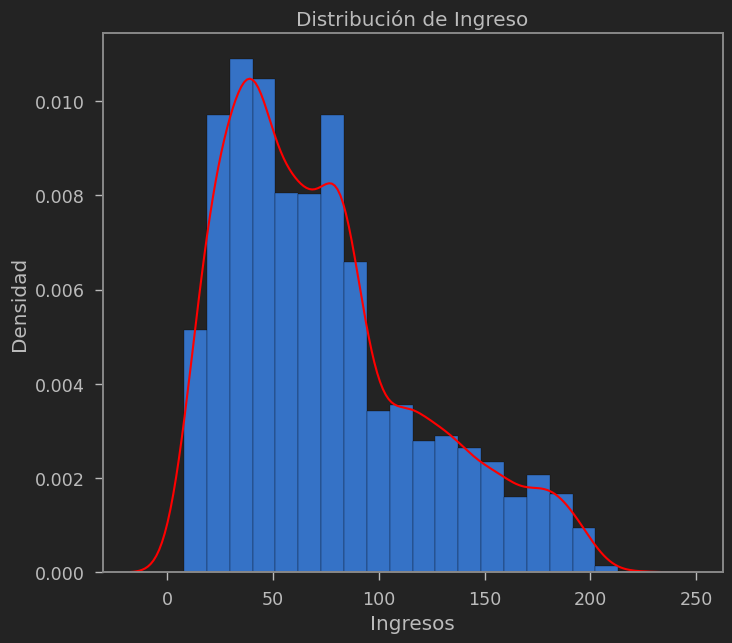

In [17]:
# Income data

# Creamos un histograma
plt.hist(df['Income'], bins=20, edgecolor='black', density=True)

# Agregamos la curva de estimación de densidad del kernel (KDE)
sns.kdeplot(df['Income'], color='red')

# Establecemos las etiquetas y el título
plt.xlabel('Ingresos')
plt.ylabel('Densidad')
plt.title('Distribución de Ingreso')

# Mostramos el gráfico
plt.show()

In [18]:
# Creamos dos dataframes para las dos subclases
personalloans = df[df['Personal Loan'] == 1]
no_personalloans = df[df['Personal Loan'] == 0]

In [19]:
personalloans.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
16,17,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
18,19,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
29,30,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
38,39,42,18,141,94114,3,5.0,3,0,1,1,1,1,0


In [20]:
personalloans.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,480.0,2390.650000,1394.393674,10.0,1166.50,2342.0,3566.0000,4981.0
Age,480.0,45.066667,11.590964,26.0,35.00,45.0,55.0000,65.0
Experience,480.0,19.843750,11.582443,0.0,9.00,20.0,30.0000,41.0
Income,480.0,144.745833,31.584429,60.0,122.00,142.5,172.0000,203.0
ZIP Code,480.0,93153.202083,1759.223753,90016.0,91908.75,93407.0,94705.5000,96008.0
Family,480.0,2.612500,1.115393,1.0,2.00,3.0,4.0000,4.0
CCAvg,480.0,3.905354,2.097681,0.0,2.60,3.8,5.3475,10.0
Education,480.0,2.233333,0.753373,1.0,2.00,2.0,3.0000,3.0
Mortgage,480.0,100.845833,160.847862,0.0,0.00,0.0,192.5000,617.0
Personal Loan,480.0,1.000000,0.000000,1.0,1.00,1.0,1.0000,1.0


In [21]:
mean_income = personalloans['Income'].mean()
mean_cc_avg = personalloans['CCAvg'].mean()

print("Ingresos medios de los clientes con préstamos personales:", mean_income)
print("Gasto medio con tarjeta de crédito de los clientes con préstamos personales:", mean_cc_avg)

Ingresos medios de los clientes con préstamos personales: 144.74583333333334
Gasto medio con tarjeta de crédito de los clientes con préstamos personales: 3.905354166666667


In [22]:
no_personalloans.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [23]:
no_personalloans.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.0,4520.000000,4520.000000,4520.000000,4520.000000
mean,2512.165487,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.0,0.102212,0.035841,0.595796,0.293584
std,1448.299331,11.450427,11.456672,40.578534,2156.949654,1.148771,1.567647,0.839975,92.038931,0.0,0.302961,0.185913,0.490792,0.455454
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1259.750000,35.000000,10.000000,35.000000,91911.000000,1.000000,0.600000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,2518.500000,45.000000,20.000000,59.000000,93437.000000,2.000000,1.400000,2.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,3768.250000,55.000000,30.000000,84.000000,94608.000000,3.000000,2.300000,3.000000,98.000000,0.0,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,8.800000,3.000000,635.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [24]:
mean_income = no_personalloans['Income'].mean()
mean_cc_avg = no_personalloans['CCAvg'].mean()

print("Renta media de los clientes sin préstamos personales:", mean_income)
print("Gasto medio con tarjeta de crédito de los clientes sin préstamos personales:", mean_cc_avg)

Renta media de los clientes sin préstamos personales: 66.23738938053097
Gasto medio con tarjeta de crédito de los clientes sin préstamos personales: 1.7290088495575222


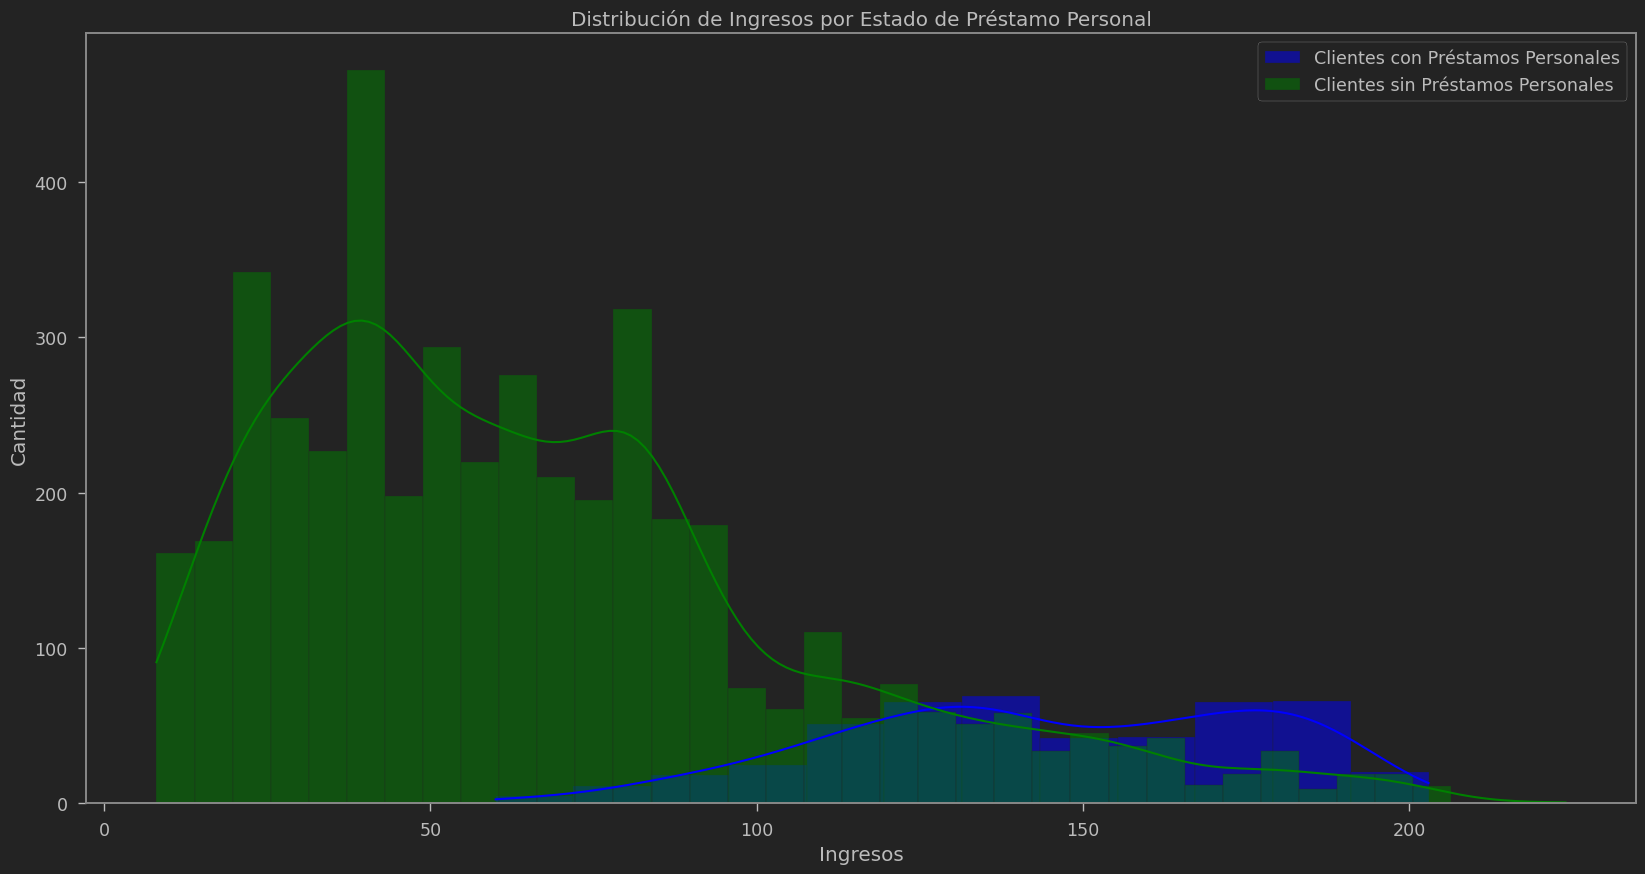

In [25]:
plt.figure(figsize=(20, 10))

# Graficamos el histograma de ingresos para clientes con préstamos personales
sns.histplot(personalloans['Income'], color='blue', label='Clientes con Préstamos Personales', kde=True)

# Graficamos el histograma de ingresos para clientes sin préstamos personales
sns.histplot(no_personalloans['Income'], color='green', label='Clientes sin Préstamos Personales', kde=True)

plt.xlabel('Ingresos')
plt.ylabel('Cantidad')
plt.title('Distribución de Ingresos por Estado de Préstamo Personal')
plt.legend()
plt.show()

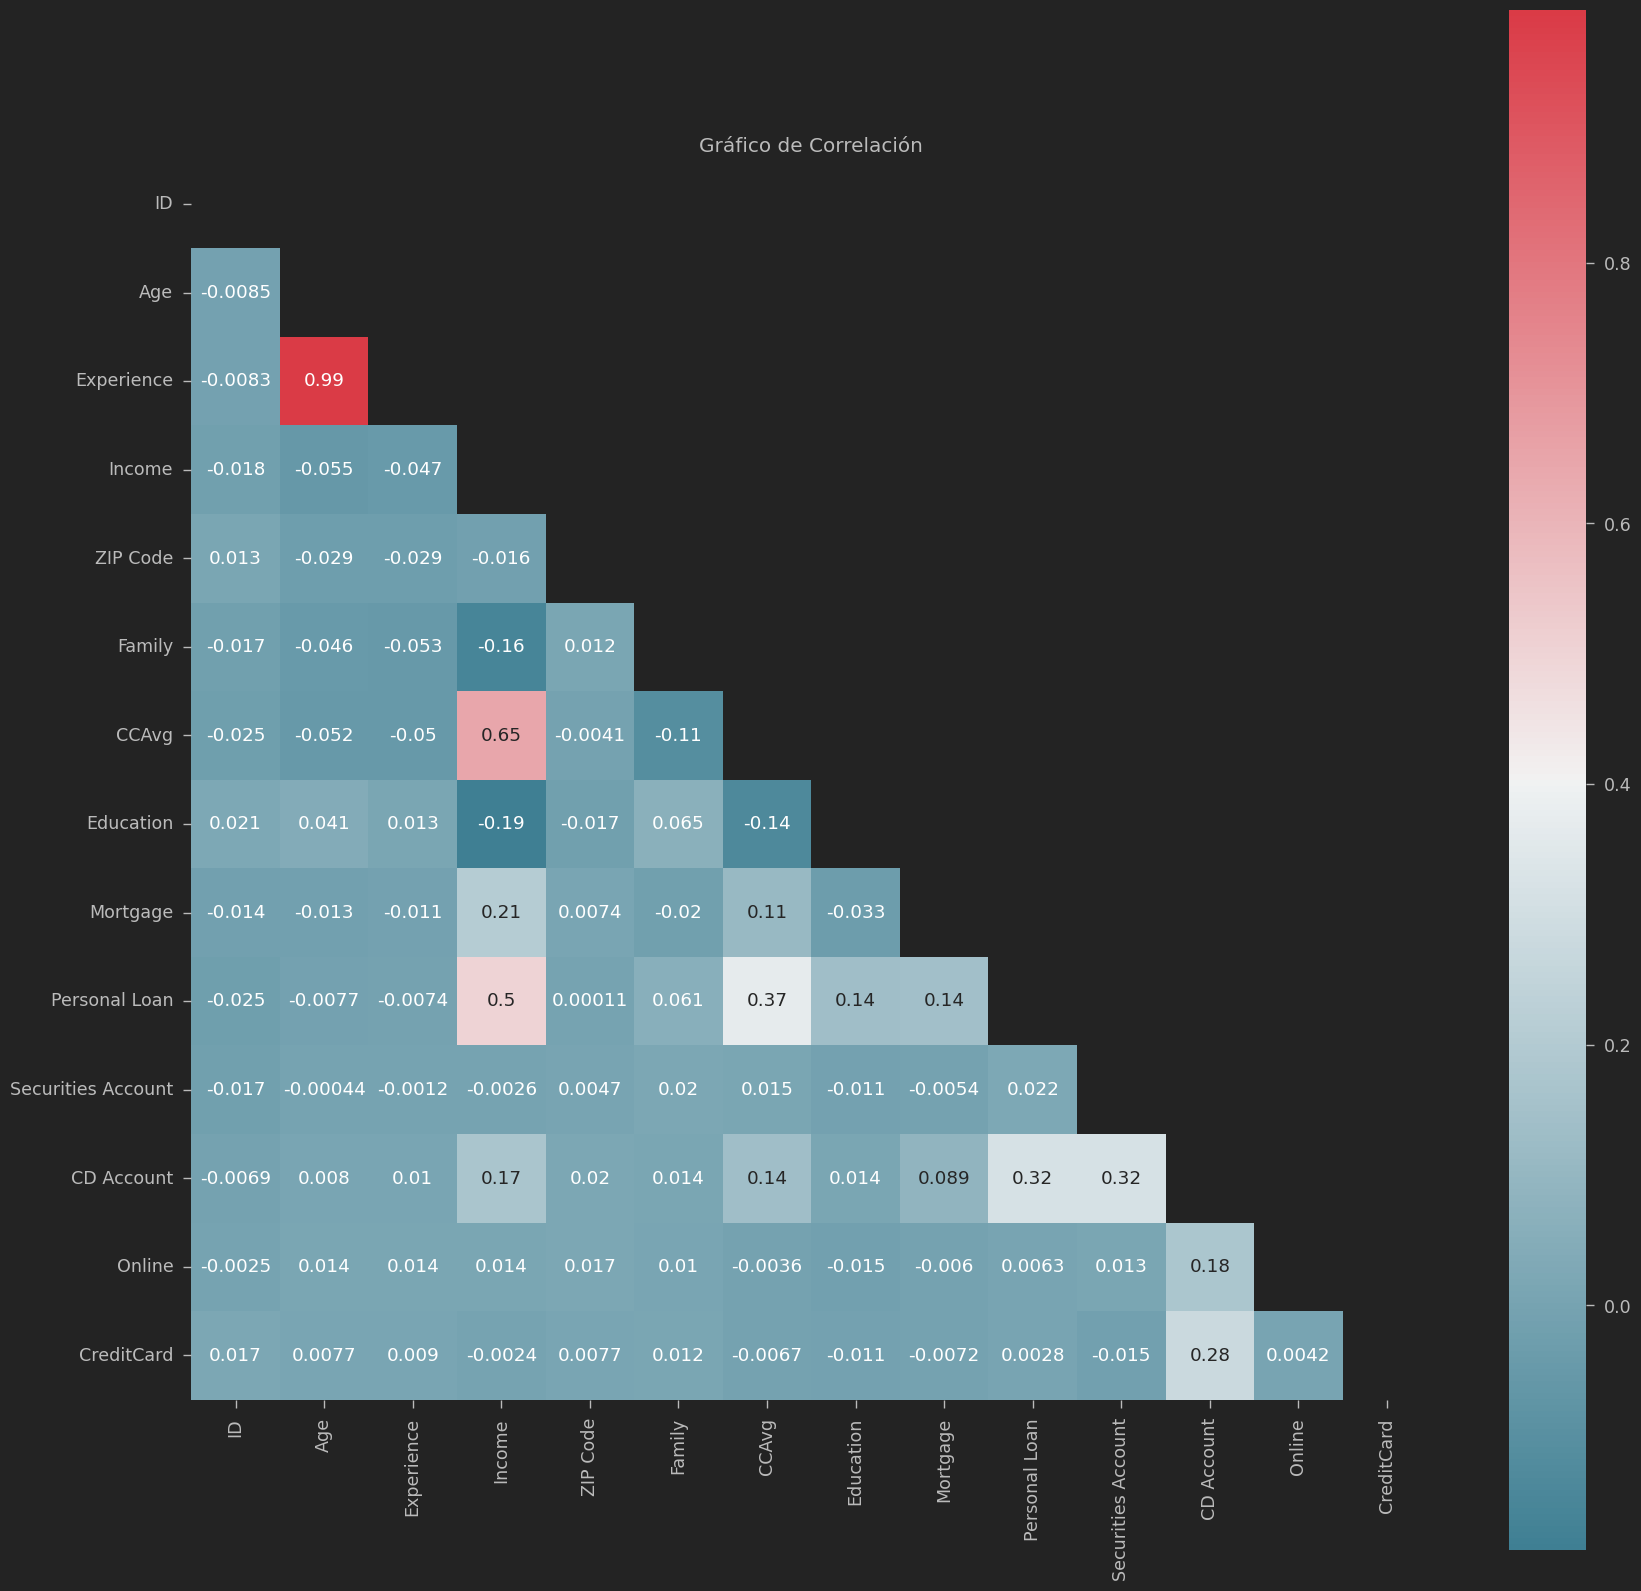

In [26]:
plt.figure(figsize=(20, 20))

# Calculamos la matriz de correlación
matriz_correlacion = df.corr()

# Generamos una máscara para el triángulo superior
mascara = np.triu(np.ones_like(matriz_correlacion, dtype=bool))

# Creamos una paleta de colores personalizada
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Graficamos la matriz de correlación
sns.heatmap(matriz_correlacion, mask=mascara, cmap=cmap, annot=True, square=True)

plt.title('Gráfico de Correlación')
plt.show()


# 4 Preparamos la data antes de entrenar el modelo

In [27]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [28]:
df = df.drop('ID', axis=1)

In [29]:
X = df.drop('Personal Loan', axis=1)
print(X.head())

   Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   25           1      49     91107       4    1.6          1         0   
1   45          19      34     90089       3    1.5          1         0   
2   39          15      11     94720       1    1.0          1         0   
3   35           9     100     94112       1    2.7          2         0   
4   35           8      45     91330       4    1.0          2         0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1  


In [30]:
y = df['Personal Loan']
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64


# 5 Escalamos la data

In [31]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [32]:
X.shape

(5000, 12)

# 6 Train, Test

Creamos un conjunto de datos de test que contenga el 10 % de los datos considerando la división entre train y test.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (4500, 12)
Testing set shape: (500, 12)


In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4500, 12), (500, 12), (4500,), (500,))

* Creamos un conjunto de datos de test que contenga el 30 % de los datos en lugar del 10 %, y consideramos tambien la división entre train y validation.


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)


print("Training:", y_train.shape)
print("Validation:", y_val.shape)
print("Testing set:", y_test.shape)

Training set shape: (2800, 12)
Validation set shape: (700, 12)
Testing set shape: (1500, 12)
Training: (2800,)
Validation: (700,)
Testing set: (1500,)


# 7 Construimos un modelo simple de redes neuronales multicapa

In [36]:
model = Sequential()

model.add(Dense(250, activation='relu', input_shape=(12,), name='dense_1'))  # Aseguremonos de definir `input_dim` según la dimensión de tus datos de entrada
#model.add(Dropout(0.5, name='dropout_1'))
model.add(Dense(500, activation='relu', name='dense_2'))
#model.add(Dense(250, activation='relu', name='dense_3'))
model.add(Dropout(0.5, name='dropout_2'))
model.add(Dense(1, activation='sigmoid', name='dense_output'))  # Capa de salida para clasificación binaria

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 250)               3250      
                                                                 
 dense_2 (Dense)             (None, 500)               125500    
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 dense_output (Dense)        (None, 1)                 501       
                                                                 
Total params: 129251 (504.89 KB)
Trainable params: 129251 (504.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#8 Compilamos y entrenamos el modelo

In [38]:
# Compilamos el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
# Entrenamos el modelo
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

Epoch 1/50
88/88 [==============================] - 7s 22ms/step - loss: 0.1962 - accuracy: 0.9293 - val_loss: 0.1199 - val_accuracy: 0.9571
Epoch 2/50
88/88 [==============================] - 1s 12ms/step - loss: 0.0895 - accuracy: 0.9707 - val_loss: 0.0964 - val_accuracy: 0.9600
Epoch 3/50
88/88 [==============================] - 1s 14ms/step - loss: 0.0738 - accuracy: 0.9775 - val_loss: 0.0870 - val_accuracy: 0.9643
Epoch 4/50
88/88 [==============================] - 1s 14ms/step - loss: 0.0687 - accuracy: 0.9764 - val_loss: 0.0915 - val_accuracy: 0.9629
Epoch 5/50
88/88 [==============================] - 1s 15ms/step - loss: 0.0612 - accuracy: 0.9807 - val_loss: 0.0839 - val_accuracy: 0.9629
Epoch 6/50
88/88 [==============================] - 2s 23ms/step - loss: 0.0554 - accuracy: 0.9786 - val_loss: 0.0767 - val_accuracy: 0.9671
Epoch 7/50
88/88 [==============================] - 2s 21ms/step - loss: 0.0493 - accuracy: 0.9839 - val_loss: 0.0759 - val_accuracy: 0.9671
Epoch 8/50
88

```

Importante!

Si previamene hemos codificado nuestros datos de y_train de forma binaria debemos usar la función de pérdida 'categorical_crossentropy' en lugar de 'sparse_categorical_crossentropy'.

* La función de pérdida 'categorical_crossentropy' se usa cuando la variable de destino está codificada, donde cada muestra tiene un vector de valores binarios que indican la presencia o ausencia de cada clase.

* La función de pérdida 'sparse_categorical_crossentropy' se usa cuando la variable de destino está representada por números enteros, lo que indica el índice de clase directamente.


```


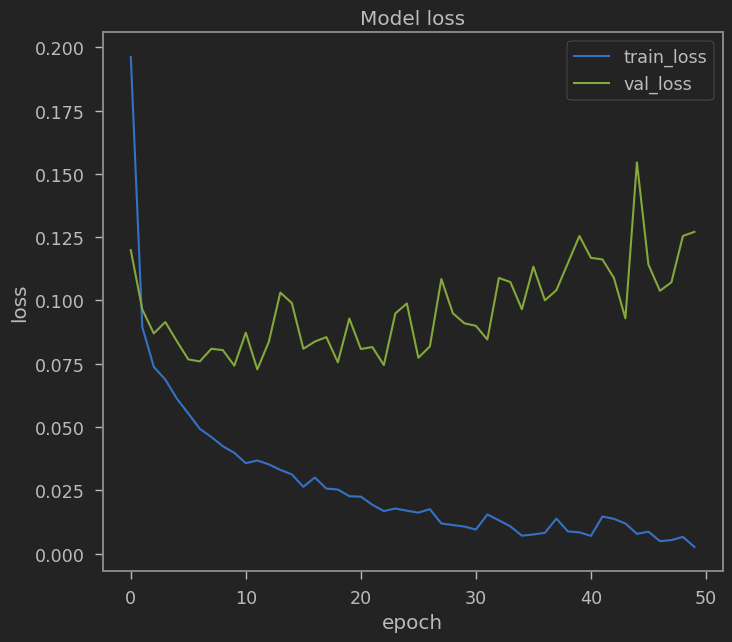

In [40]:
# Graficamos el rendimiento del modelo a lo largo de las épocas
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

La gráfica muestra la evolución de la pérdida del modelo ("loss") a lo largo de varias épocas durante el entrenamiento y la validación del modelo de red neuronal artificial.

- Línea Azul: Representa cuánto error está generando el modelo sobre el conjunto de entrenamiento en cada época. Un valor bajo indica que el modelo está aprendiendo bien de los datos de entrenamiento.

- Línea Verde: Representa cuánto error está generando el modelo sobre un conjunto de datos no visto durante el entrenamiento.

Observamos que la pérdida de entrenamiento disminuye mientras que la pérdida de validación comienza a aumentar y fluctuar significativamente. Esto puede ser un indicador de sobreajuste, es decir, se puede estar prediciendo casi perfectamente los datos a expensas de la capacidad de generalización.


#9 Comparación de modelos

Entrenaremos el modelo con una arquitectura distinta y lo compararemos con otro modelo.


In [41]:
# Preprocesamiento de los datos
#X = df.drop('Personal Loan', axis=1)
#y = df['Personal Loan']
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

# Modelo de Regresión logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predicciones y probabilidades del modelo de regresión logística
logistic_predictions = logistic_model.predict(X_test)
logistic_probabilities = logistic_model.predict_proba(X_test)



###Nota importante : Estaremos realizando un cambio de formato en la variable "y" de una columna a dos columnas, por lo que cambiamos la función sigmoidea a softmax.

In [42]:
###############################################################################################################333

# Convertimos las etiquetas a formato categórico (codificación one-hot)
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_val)
y_test_categorical = to_categorical(y_test)

###############################################################################################################333

# Modelo de redes neuronales
ANN_model = Sequential()
ANN_model.add(Dense(250, input_dim=12, kernel_initializer='normal', activation='relu'))
ANN_model.add(Dropout(0.2))
ANN_model.add(Dense(500, activation='relu'))
ANN_model.add(Dropout(0.2))
ANN_model.add(Dense(500, activation='relu'))
ANN_model.add(Dropout(0.2))
ANN_model.add(Dense(250, activation='relu'))
ANN_model.add(Dropout(0.2))
ANN_model.add(Dense(2, activation='softmax')) ########################################## Importante ######################################333

# Compilamos el modelo
ANN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamos el modelo
history = ANN_model.fit(X_train, y_train_categorical, validation_data=(X_val, y_val_categorical), epochs=10, batch_size=32)

# Predicciones del modelo de regresión logística
neural_network_predictions = ANN_model.predict(X_test)

# Convertimos las predicciones a formato binario (0 or 1)
neural_network_predictions_binary = np.argmax(neural_network_predictions, axis=1)


Epoch 1/10
88/88 [==============================] - 3s 15ms/step - loss: 0.1811 - accuracy: 0.9289 - val_loss: 0.1049 - val_accuracy: 0.9557
Epoch 2/10
88/88 [==============================] - 1s 13ms/step - loss: 0.0929 - accuracy: 0.9675 - val_loss: 0.0858 - val_accuracy: 0.9586
Epoch 3/10
88/88 [==============================] - 1s 12ms/step - loss: 0.0809 - accuracy: 0.9718 - val_loss: 0.0965 - val_accuracy: 0.9643
Epoch 4/10
88/88 [==============================] - 1s 13ms/step - loss: 0.0666 - accuracy: 0.9771 - val_loss: 0.0920 - val_accuracy: 0.9614
Epoch 5/10
88/88 [==============================] - 1s 13ms/step - loss: 0.0608 - accuracy: 0.9814 - val_loss: 0.0844 - val_accuracy: 0.9629
Epoch 6/10
88/88 [==============================] - 1s 14ms/step - loss: 0.0554 - accuracy: 0.9825 - val_loss: 0.0931 - val_accuracy: 0.9671
Epoch 7/10
88/88 [==============================] - 1s 13ms/step - loss: 0.0542 - accuracy: 0.9789 - val_loss: 0.0618 - val_accuracy: 0.9700
Epoch 8/10
88

```
Cada muestra está representada por un vector de longitud 2, donde el valor 1 indica la presencia de la clase correspondiente y 0 indica su ausencia.

El número de elementos en cada vector es igual al número total de clases.

El orden de las clases en los vectores codificados one-hot debe coincidir con el orden en que aparecen en sus etiquetas originales.

y_train = [[1, 0],  # La muestra 1 pertenece a la clase 0
           [0, 1],  # La muestra 2 pertenece a la clase 1
           [1, 0],  # La muestra 2 pertenece a la clase 0
           ...,
           [0, 1]]  #  La muestra n pertenece a la clase 1

```


Confusion Matrix - Logistic Regression:
[[1328   15]
 [  57  100]]

Confusion Matrix - Neural Network:
[[1335    8]
 [  26  131]]


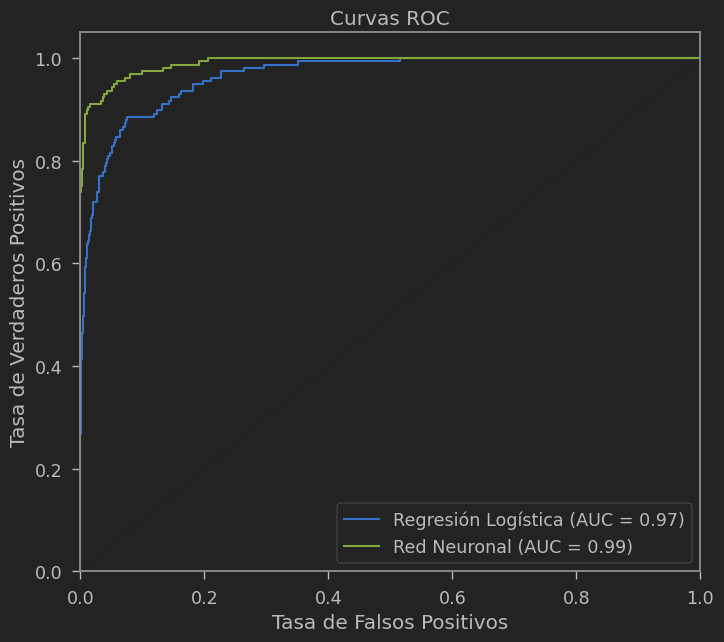

In [43]:
# Regresión Logística
 ## Matriz de confusión
logistic_cm = confusion_matrix(y_test, logistic_predictions)
 ## Curva ROC
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_probabilities[:, 1])
logistic_auc = auc(logistic_fpr, logistic_tpr)

# Redes Neuronales
 ## Matriz de confusión -
neural_network_cm = confusion_matrix(y_test, neural_network_predictions_binary)
 ## Curva ROC
neural_network_fpr, neural_network_tpr, _ = roc_curve(y_test, neural_network_predictions[:, 1])
neural_network_auc = auc(neural_network_fpr, neural_network_tpr)

# Visualizamos
  ##  Matriz de confusión
print("Confusion Matrix - Logistic Regression:")
print(logistic_cm)
print("\nConfusion Matrix - Neural Network:")
print(neural_network_cm)
  ## Curva ROC
plt.figure()
plt.plot(logistic_fpr, logistic_tpr, label='Regresión Logística (AUC = {:.2f})'.format(logistic_auc))
plt.plot(neural_network_fpr, neural_network_tpr, label='Red Neuronal (AUC = {:.2f})'.format(neural_network_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC')
plt.legend(loc='lower right')
plt.show()

# 9 Evaluamos el desempeño del modelo entrenado con redes neuronales

In [44]:
# Realizamos predicciones
predictions = ANN_model.predict(X_test)

# Creamos una lista 'predict' que contiene los índices de las clases predichas
y_pred = [np.argmax(i) for i in predictions]

# Creamos el DataFrame con el índice de 'y_test'
results_df = pd.DataFrame(predictions, index=y_test.index, columns=['Probabilidad Clase 0', 'Probabilidad Clase 1'])
results_df['Clase Predicha'] = y_pred
results_df['Clase Real'] = y_test

# Redondeamos las probabilidades a dos decimales
results_df = results_df.round(2)

# Agregamos un índice para cada muestra
results_df.index.name = 'Índice del Dato'

# Imprimimos el DataFrame mostrando las primeras 5 filas
results_df.head(5)

47/47 [==============================] - 0s 3ms/step


,Probabilidad Clase 0,Probabilidad Clase 1,Clase Predicha,Clase Real
Índice del Dato,,,,
1501,1.00,0.00,0,0
2586,0.00,1.00,1,1
2653,0.98,0.02,0,0
1055,1.00,0.00,0,0
705,1.00,0.00,0,0


In [45]:
# Filtramos para encontrar los casos donde la clase predicha no coincide con la clase real
mismatches = results_df[results_df['Clase Predicha'] != results_df['Clase Real']]

# Imprimimos los resultados
mismatches.head(2)

,Probabilidad Clase 0,Probabilidad Clase 1,Clase Predicha,Clase Real
Índice del Dato,,,,
29,0.72,0.28,0,1
4439,0.71,0.29,0,1


In [46]:
#cm = confusion_matrix(y_test, y_pred)

# Extraemos los valores de la matriz de confusión
TP = neural_network_cm[1, 1]  # Verdaderos Positivos: Clase real es 1, predicción es 1
FP = neural_network_cm[0, 1]  # Falsos Positivos: Clase real es 0, predicción es 1
TN = neural_network_cm[0, 0]  # Verdaderos Negativos: Clase real es 0, predicción es 0
FN = neural_network_cm[1, 0]  # Falsos Negativos: Clase real es 1, predicción es 0

# Imprimimos los resultados
print(f"Verdaderos Positivos (TP): Instancias en las que el modelo predijo la clase positiva (1) correctamente.\nEn la matriz hay {TP} verdaderos positivos.\n")

print(f"Falsos Positivos (FP): Instancias en las que el modelo predijo incorrectamente la clase positiva (1) cuando en realidad era la clase negativa (0).\nAquí tenemos {FP} falsos positivos.\n")

print(f"Verdaderos Negativos (TN): Instancias en las que el modelo predijo correctamente la clase negativa (0).\nTenemos {TN} verdaderos negativos.\n")

print(f"Falsos Negativos (FN): Instancias en las que el modelo no logró identificar la clase positiva (1), prediciendo erróneamente la clase negativa (0).\nEn la matriz hay {FN} falsos negativos.\n")

Verdaderos Positivos (TP): Instancias en las que el modelo predijo la clase positiva (1) correctamente.
En la matriz hay 131 verdaderos positivos.

Falsos Positivos (FP): Instancias en las que el modelo predijo incorrectamente la clase positiva (1) cuando en realidad era la clase negativa (0).
Aquí tenemos 8 falsos positivos.

Verdaderos Negativos (TN): Instancias en las que el modelo predijo correctamente la clase negativa (0).
Tenemos 1335 verdaderos negativos.

Falsos Negativos (FN): Instancias en las que el modelo no logró identificar la clase positiva (1), prediciendo erróneamente la clase negativa (0).
En la matriz hay 26 falsos negativos.



In [47]:
# Calculamos las métricas de desempeño
precision = precision_score(y_test, y_pred)  # Precisión
recall = recall_score(y_test, y_pred)        # Sensibilidad
f1 = f1_score(y_test, y_pred)                # F1-Score
accuracy = accuracy_score(y_test, y_pred)    # Exactitud
specificity = TN / (TN + FP)                 # Especificidad

# Imprimimos todas las métricas
print(f"Exactitud (Accuracy): {accuracy:.2f}")
print(f"Sensibilidad o Recall: {recall:.2f}")
print(f"Especificidad: {specificity:.2f}")
print(f"Precisión (Precision): {precision:.2f}")
print(f"F1-Score: {f1:.2f}")

Exactitud (Accuracy): 0.98
Sensibilidad o Recall: 0.83
Especificidad: 0.99
Precisión (Precision): 0.94
F1-Score: 0.89


```

# Descripción del reporte de clasificación

* Clase: La etiqueta de clase para la cual se están reportando las métricas.

* Exactitud (Accuracy):
Proporción de predicciones correctas sobre el total de predicciones realizadas por el modelo.
Medida general de la precisión del modelo.

* Recall (Recall o Sensibilidad):
Proporción de verdaderos positivos (TP) sobre la suma de verdaderos positivos y falsos negativos (FN).
Mide la capacidad del modelo para encontrar todos los ejemplos positivos.

* Especificidad (Specificity):
Proporción de verdaderos negativos (TN) sobre la suma de verdaderos negativos y falsos positivos (FP).
Mide la capacidad del modelo para identificar correctamente los ejemplos negativos.

* Precisión (Precision):
Proporción de verdaderos positivos (TP) sobre la suma de verdaderos positivos y falsos positivos (FP).
Mide la exactitud de las predicciones positivas.

* F1-score:
Medida de la precisión y el recall combinados en un solo valor.
Media armónica de la precisión y el recall y proporciona una medida equilibrada de la calidad de la clasificación.

```

# **Tarea**

````
** Complete los apellidos y nombres completos de los participantes y su participación**

1) Gil Oré, Diego Rafael

````

**Indicaciones:**

Trabajar y ejecutar todo el código en Colab.

Responder en las casillas correspondiente, en las que se indica:
Escriba su respuesta aquí ...
Complete el siguiente código ...

Verifique que el código completo funciona antes de remitirlo.
¡Importante!:

Partimos de los formatos originales de las variables en la base de datos.

¡Importante!:

Reiniciar el entorno de ejecución antes de ejecutar los siguientes pasos.

Los entregables de la tarea son el código ejecutado y un documento en word (no pdf) con el desarrollo de la tarea incluyendo los códigos en texto.

In [48]:
df = pd.read_csv('/content/data_loan.csv')

In [49]:
df.drop('ID', axis=1, inplace=True)

In [50]:
X= df.drop('Personal Loan', axis=1)
print(X.head())

   Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   25           1      49     91107       4    1.6          1         0   
1   45          19      34     90089       3    1.5          1         0   
2   39          15      11     94720       1    1.0          1         0   
3   35           9     100     94112       1    2.7          2         0   
4   35           8      45     91330       4    1.0          2         0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1  


In [51]:
y = df['Personal Loan']
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64


In [52]:
df.shape

(5000, 13)

In [53]:
# Establecemos las siguientes semillas aleatorias para que el código sea reproducible.
np.random.seed(42)
tf.random.set_seed(42)

# Pregunta 1

Creamos un conjunto de datos de prueba que contenga el 80% de los datos en train y el 20 % de los datos en test.

In [54]:
# Escriba su código para responder la pregunta aquí (random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

print("Training:", y_train.shape)
print("Testing set:", y_test.shape)

Training set shape: (4000, 12)
Testing set shape: (1000, 12)
Training: (4000,)
Testing set: (1000,)


# Pregunta 2

Realizamos una partición adicional creando los subconjuntos de train y validation.
20% de los datos en validation y 80 % de los datos en train.

In [55]:
# Escriba su código para responder la pregunta aquí (random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)


print("Training:", y_train.shape)
print("Validation:", y_val.shape)
print("Testing set:", y_test.shape)

Training set shape: (3200, 12)
Validation set shape: (800, 12)
Testing set shape: (1000, 12)
Training: (3200,)
Validation: (800,)
Testing set: (1000,)


# Pregunta 3

 ¿Por qué es importante emplear una muestra de validación al procesar un algoritmo de redes neuronales?




```
# Escriba su respuesta aquí: Debido a que se requiere comprobar los resultados de train con una data que no ha sido entrenada para poder evaluar las métricas de precisión del modelo o los errores. Sobre todo cuando se tiene que hacer las iteraciones hacia atrás sucesivamente en las redes neuronales. Esta data es importante para dicho ajuste.
```


# Pregunta 4

Creamos una red neuronal con la arquitectura que se muestra en la siguiente imagen e imprimimos su summary.

Importante :: considere este nombre para su modelo :  model_ANN_1


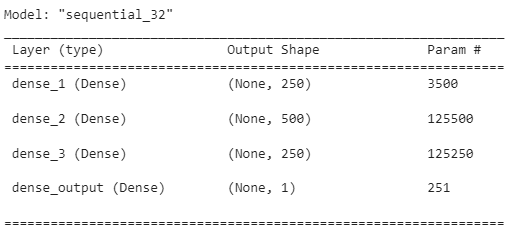

In [56]:
model_ANN_1 = Sequential()

model_ANN_1.add(Dense(250, activation='relu', input_shape=(12,), name='dense_1'))
model_ANN_1.add(Dense(500, activation='relu', name='dense_2'))
model_ANN_1.add(Dense(250, activation='relu', name='dense_3'))
model_ANN_1.add(Dense(1, activation='sigmoid', name='dense_output'))  #capa de salida binaria

model_ANN_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 250)               3250      
                                                                 
 dense_2 (Dense)             (None, 500)               125500    
                                                                 
 dense_3 (Dense)             (None, 250)               125250    
                                                                 
 dense_output (Dense)        (None, 1)                 251       
                                                                 
Total params: 254251 (993.17 KB)
Trainable params: 254251 (993.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Pregunta 5

Capa inicial:

¿Cuál es la dimensión de los datos de entrada? (indicar número)

¿La dimensión de los datos de entrada corresponde al número de variables features o al número de variables totales de la base de datos?

¿La dimensión de los datos de entrada se ingresa en el primer o segundo argumento de la primera capa Dense?

¿Cuántas neuronas de salida tiene esta primera capa? (indicar número)

```
# Escriba su respuesta aquí:
La dimensión es 12 que corresponde a los imputs o las variables explicativas (features). Se ingresa en el primer argumento de la primera capa Dense usando input_shape. Las neuronas de salida de la primera capa son 250.
```

# Pregunta 6

Capa de salida

¿ Cuál es el número de neuronas de salida ?

¿ En este problema de clasificación qué función de activación usaría en la capa final ? Justifique

¿ En un problema de regresión podría utilizar esa misma función de activación ?Justifique

```
# Escriba su respuesta aquí: En este problema de clasificación, se está utilizando la función de activación sigmoid en la capa final. Esta es una elección apropiada porque el problema es de clasificación binaria. La función de activación sigmoid convierte la salida de la red en un valor entre 0 y 1, que puede interpretarse como una probabilidad de pertenecer a una de las dos clases. Dado un umbral de 0.5, si la salida es mayor a 0.5, se puede clasificar como una clase, y si es menor a 0.5, se clasifica como la otra clase negativa en este caso.

```

# Pregunta 7

Compile y entrene el modelo utilizando 60 épocas.

In [57]:
# Complete el siguiente código para responder la pregunta aquí
# Incluya una métrica loss, un optimizador y una métrica de accuracy
########### Importante :: utilice la métrica accuracy y el optimizer='adam'####
model_ANN_1.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

history_ANN_1 = model_ANN_1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=60, batch_size=32)

Epoch 1/60
100/100 [==============================] - 3s 15ms/step - loss: 791.2928 - accuracy: 0.8291 - val_loss: 181.8012 - val_accuracy: 0.8775
Epoch 2/60
100/100 [==============================] - 1s 13ms/step - loss: 85.4814 - accuracy: 0.8478 - val_loss: 35.1072 - val_accuracy: 0.8775
Epoch 3/60
100/100 [==============================] - 1s 12ms/step - loss: 65.3951 - accuracy: 0.8341 - val_loss: 124.8740 - val_accuracy: 0.8775
Epoch 4/60
100/100 [==============================] - 1s 8ms/step - loss: 36.9965 - accuracy: 0.8422 - val_loss: 35.0774 - val_accuracy: 0.8775
Epoch 5/60
100/100 [==============================] - 1s 8ms/step - loss: 27.6268 - accuracy: 0.8441 - val_loss: 15.3811 - val_accuracy: 0.8775
Epoch 6/60
100/100 [==============================] - 1s 8ms/step - loss: 16.7680 - accuracy: 0.8334 - val_loss: 23.2730 - val_accuracy: 0.8775
Epoch 7/60
100/100 [==============================] - 1s 8ms/step - loss: 9.4955 - accuracy: 0.8494 - val_loss: 1.2585 - val_accur

# Pregunta 8
Graficamos el rendimiento del modelo a lo largo de las épocas.

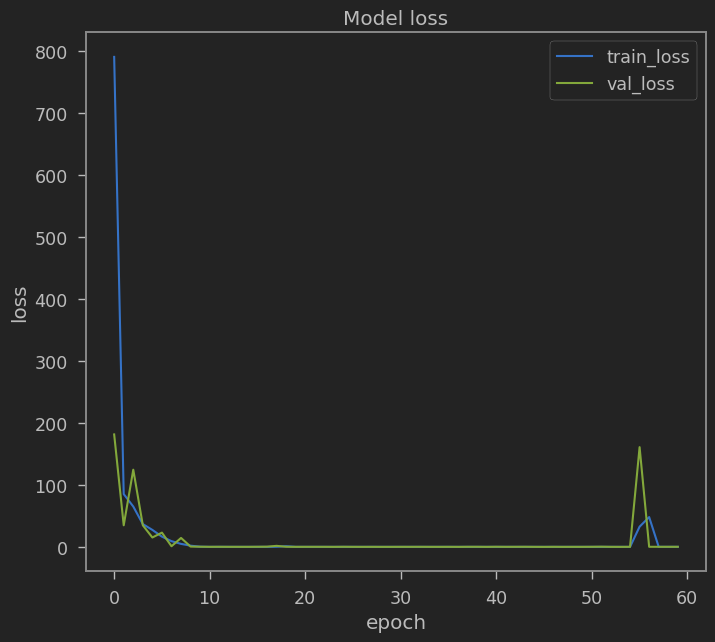

In [58]:
plt.plot(history_ANN_1.history['loss'])
plt.plot(history_ANN_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

# Pregunta 9

Estimamos las predicciones, las clases reales e imprimimos los primeros 20 registros.

In [59]:
predictions_ANN_1 = model_ANN_1.predict(X_test)

# Crear una lista 'y_pred' que contiene las clases predichas (0 o 1)
y_pred = [np.argmax(i) for i in predictions_ANN_1]

# Crear el DataFrame con el índice de 'y_test'
results_df_1 = pd.DataFrame(predictions_ANN_1, index=y_test.index, columns=['Probabilidad Clase 1'])
results_df_1['Clase Predicha'] = y_pred
results_df_1['Clase Real'] = y_test

# Redondear las probabilidades a dos decimales
results_df_1 = results_df_1.round(2)

# Agregar un índice para cada muestra
results_df_1.index.name = 'Índice del Dato'

# Imprimir el DataFrame mostrando los primeros 20 registros
results_df_1.head(20)


32/32 [==============================] - 0s 4ms/step


,Probabilidad Clase 1,Clase Predicha,Clase Real
Índice del Dato,,,
1501,0.09,0,0
2586,0.09,0,1
2653,0.09,0,0
1055,0.09,0,0
705,0.09,0,0
106,0.09,0,0
589,0.09,0,0
2468,0.09,0,0
2413,0.09,0,0


# Pregunta 10

Estimaremos un modelo usando el algoritmo random forest para comparar los resultados con los de la red neuronal.

Utilice GridSearchCV de sklearn para encontrar los mejores hiperparámetros para el modelo.
Emplee los siguientes hiperparámetros.


In [60]:
#param_grid = {
#    'n_estimators': [100, 200, 300],  # número de árboles
#    'max_features': ['auto', 'sqrt', 'log2'],  # número máximo de características consideradas para dividir un nodo
#    'max_depth': [None, 10, 20, 30],  # máxima profundidad de cada árbol
#    'min_samples_split': [2, 5, 10]  # el mínimo número de muestras requeridas para dividir un nodo
#}

In [61]:
# Complete el siguiente código para responder la pregunta aquí
# Modelo de Random Forest
# rf_model = ...
#rf_model.fit(...)
# Predicciones del modelo de Random Forest
#rf_predictions = ...
#rf_probabilities = rf_model.predict_proba(...)
# Respuesta:
# (no elimine esta celda)
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

# Modelo de Random Forest con GridSearchCV
rf_model = RandomForestClassifier(random_state=1812)

# Diccionario de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Implementación de GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=3, return_train_score=True)
grid_search.fit(X_train, y_train)

# Imprimir los resultados de GridSearchCV
print(f'Grid Search CV train set score: {grid_search.score(X_train, y_train)}')
print(f'Grid Search CV test set score: {grid_search.score(X_test, y_test)}')
print(f'Grid Search CV best parameters: {grid_search.best_params_}')
print(f'Grid Search CV best cross-validation score: {grid_search.best_score_}')
print(f'Grid Search CV best estimator: {grid_search.best_estimator_}')

# Predicciones del modelo de Random Forest
rf_predictions = grid_search.predict(X_test)
rf_probabilities = grid_search.predict_proba(X_test)[:, 1]

# Métricas de rendimiento
print('Confusion Matrix:')
print(confusion_matrix(y_test, rf_predictions))
print('Classification Report:')
print(classification_report(y_test, rf_predictions))
print(f'Precision: {precision_score(y_test, rf_predictions)}')
print(f'Recall: {recall_score(y_test, rf_predictions)}')
print(f'F1 Score: {f1_score(y_test, rf_predictions)}')
print(f'Accuracy: {accuracy_score(y_test, rf_predictions)}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Grid Search CV train set score: 0.9975
Grid Search CV test set score: 0.99
Grid Search CV best parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 100}
Grid Search CV best cross-validation score: 0.98625136492876
Grid Search CV best estimator: RandomForestClassifier(max_features='auto', min_samples_split=5,
                       random_state=1812)
Confusion Matrix:
[[894   1]
 [  9  96]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.99      0.91      0.95       105

    accuracy                           0.99      1000
   macro avg       0.99      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000

Precision: 0.9896907216494846
Recall: 0.9142857142857143
F1 Score: 0.9504950495049506
Accuracy: 0.99


# Pregunta 11

Generamos las curvas roc e imprimimos las métricas auc de los modelos random forest y redes neuronales en una misma gráfica.

Importante!

Recuerde que las curvas roc deben tener forma de curvaturas; si no la tuvieran se estaría generando un error por los argumentos incluídos en roc_curve.

Importante!

Verifique formato de las salidas que ha obtenido: rf_prob y nn_prob.

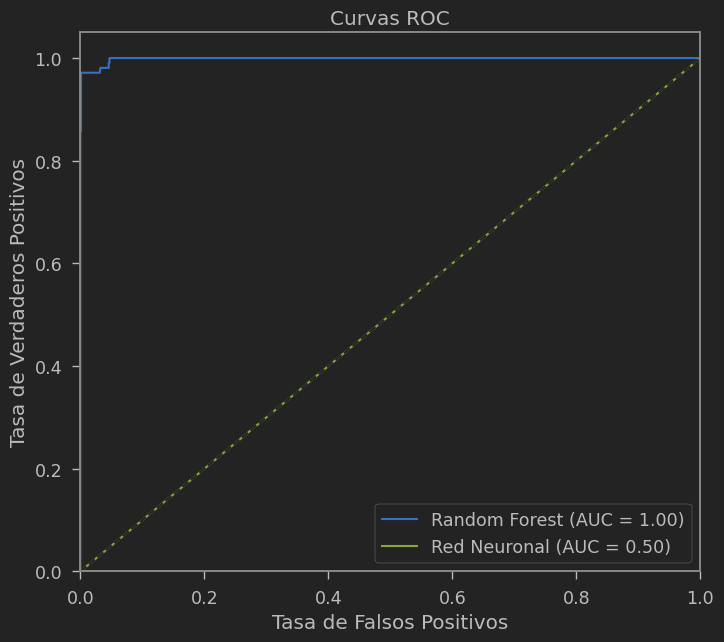

In [62]:
# Curvas ROC y AUC - Red Neuronal
if len(rf_probabilities.shape) == 1:
    # Esto ocurre si predict_proba devuelve un array 1D, que no es común pero posible
    rf_probabilities = np.vstack((1 - rf_probabilities, rf_probabilities)).T

# Curvas ROC y AUC - Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probabilities[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))


nn_fpr, nn_tpr, _ = roc_curve(y_test, y_pred)
nn_auc = auc(nn_fpr, nn_tpr)
plt.plot(nn_fpr, nn_tpr, label='Red Neuronal (AUC = {:.2f})'.format(nn_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC')
plt.legend(loc='lower right')
plt.show()


In [63]:

# Random Forest
rf_cm = confusion_matrix(y_test, rf_predictions)
print("Matriz de Confusión - Random Forest:")
print(rf_cm)

# Red Neuronal
neural_network_cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión - Red Neuronal:")
print(neural_network_cm)

Matriz de Confusión - Random Forest:
[[894   1]
 [  9  96]]
Matriz de Confusión - Red Neuronal:
[[895   0]
 [105   0]]


# Pregunta 12

Importancia de Características
¿Es posible obtener la importancia de las características en una red neuronal como en Random Forest? Discuta las diferencias en cómo ambos modelos interpretan la importancia de las características.

```
# Escriba su respuesta aquí:
Es evidente que para el caso de un random forest puede hacerse un gráfico de feature importance y evaluar las variables que son más importantes para la predicción del modelo. Lo cual es directo e intuitivo. Son medidas concretas de impacto de las variables en el modelo que son fáciles de visualizar.
En el caso de la red neuronal se puede ver que hay una permutación de las features para la asignación de pesos relativos a optimizar mejor el modelo y disminuir el error. La interpretación es complicada porque hay capas o el modelo es no lineal simplemente. Los pesos en las capas ocultas pueden ser complicados de interpretar directamente. A menudo se enfoca en predicciones locales y no hay una forma de implimir la importancia de las variables.

```

# Pregunta 13

La normalización es crucial para la eficiencia y la efectividad de los modelos de machine learning.

Investigue cómo diferentes técnicas de preprocesamiento de datos (como la normalización, la estandarización y el tratamiento de valores faltantes) afectan el rendimiento de ambos modelos.

Implemente al menos la siguiente técnica de normalización, reejecute su modelo con las misma estructura de capas anterior, imprima y compare los resultados de performance del modelo.

Importante :: considere este nombre para su modelo :  model_ANN_2


In [65]:
# Ejemplo
from sklearn.preprocessing import MinMaxScaler
# Instancia
scaler = MinMaxScaler()

# Ajuste de los datos de entrenamiento
scaler.fit(X_train)

# Transformacion de datos
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# Pregunta 14

Implemente la técnica de regularización dropout, no considere la normalización, y compare los resultados de performance del modelo.

Creamos una red neuronal con la arquitectura que se muestra en la siguiente imagen e imprimimos su summary para comprobar.

Ejecute su modelo e imprima y compare los resultados de performance del modelo.

Importante :: considere este nombre para su modelo :  model_ANN_3

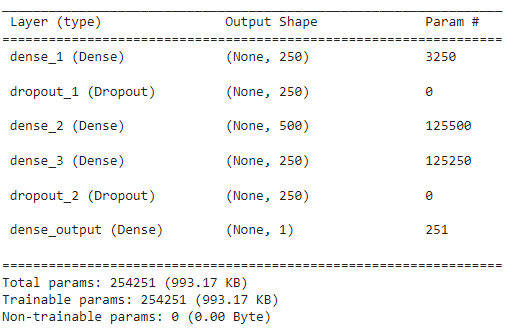

In [74]:
# Escriba su código para responder la pregunta aquí.
# Modelo de redes neuronales
model_ANN_3 = Sequential()
model_ANN_3.add(Dense(250, input_dim=12, kernel_initializer='he_normal', activation='relu'))
model_ANN_3.add(Dropout(0.2))
model_ANN_3.add(Dense(500, activation='relu'))
model_ANN_3.add(Dense(250, activation='relu'))
model_ANN_3.add(Dropout(0.2))
model_ANN_3.add(Dense(1, activation='sigmoid'))

# Compilación
model_ANN_3.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])  # Cambiado a 'binary_crossentropy'

# Entrenamiento
history_3 = model_ANN_3.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=10, batch_size=32)

# predicciones
ANN_3_predictions = model_ANN_3.predict(X_test_scaled)
ANN_3_predictions_binary = (ANN_3_predictions >= 0.5).astype(int)
model_ANN_3.summary()

Epoch 1/10
100/100 [==============================] - 2s 10ms/step - loss: 0.2127 - accuracy: 0.9262 - val_loss: 0.1894 - val_accuracy: 0.9337
Epoch 2/10
100/100 [==============================] - 1s 13ms/step - loss: 0.1020 - accuracy: 0.9622 - val_loss: 0.1280 - val_accuracy: 0.9550
Epoch 3/10
100/100 [==============================] - 1s 14ms/step - loss: 0.0881 - accuracy: 0.9672 - val_loss: 0.1318 - val_accuracy: 0.9500
Epoch 4/10
100/100 [==============================] - 1s 11ms/step - loss: 0.0829 - accuracy: 0.9725 - val_loss: 0.1939 - val_accuracy: 0.9413
Epoch 5/10
100/100 [==============================] - 1s 8ms/step - loss: 0.0666 - accuracy: 0.9775 - val_loss: 0.1744 - val_accuracy: 0.9500
Epoch 6/10
100/100 [==============================] - 1s 8ms/step - loss: 0.0672 - accuracy: 0.9759 - val_loss: 0.1504 - val_accuracy: 0.9538
Epoch 7/10
100/100 [==============================] - 1s 7ms/step - loss: 0.0625 - accuracy: 0.9766 - val_loss: 0.1311 - val_accuracy: 0.9613
Ep

# Pregunta 15

Conlcusiones y comentarios finales de su trabajo. Incluya las ventajas y desventajas.

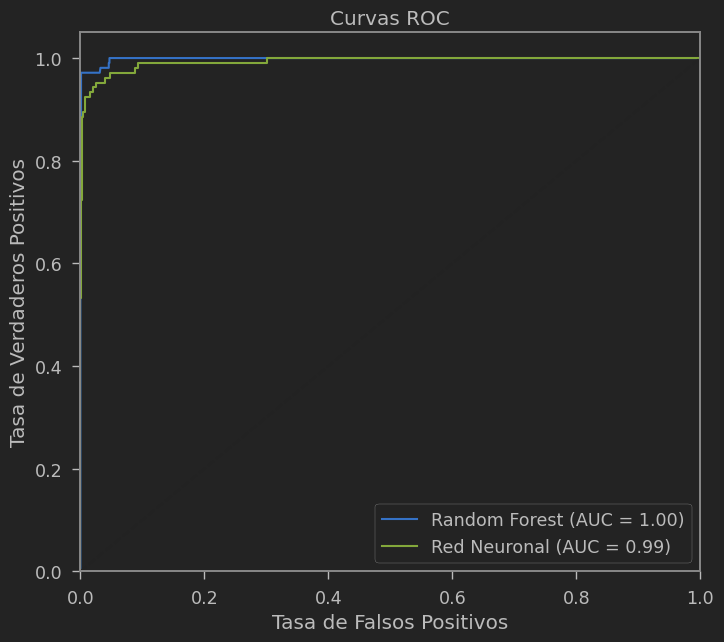

In [78]:
# Calcular las curvas ROC y AUC para ambos modelos
#Según la pregunta 14
nn_fpr_3, nn_tpr_3, _ = roc_curve(y_test, ANN_3_predictions)
nn_auc_3 = auc(nn_fpr_3, nn_tpr_3)

# Graficar las curvas ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot(nn_fpr_3, nn_tpr_3, label='Red Neuronal (AUC = {:.2f})'.format(nn_auc_3))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC')
plt.legend(loc='lower right')
plt.show()

´´´

Se puede ver que con la normalización fue suficiente para que el modelo tenga un gran nivel de ajuste como se puede ver en la curva roc. Hay una mejor tasa de falsos positivos con una alta tasa de verdaderos positivos. Aún así, la red neuronal ha hecho un gran ajuste. Se puede ver que debido a las variables se puede alcanzar un alto niver predictivo.

En el modelo se usó un ajuste de pérdida binario, lo cual pudo ayudar de forma eficiente con el ajuste. 10 iteraciones bastaron para alcanzar el nivel de predicción alto. Se utilizaron capas de dropout para evitar el sobre ajuste en las capas ocultas de la red, lo cual garantizó la eficiencia.

´´´